For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'. In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.30, random_state=2)

I will import the Support Vector Machine library and look at the results, note that standardization is required for this method.

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
svc = SVC()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       170
           1       0.87      0.70      0.78        97

    accuracy                           0.85       267
   macro avg       0.86      0.82      0.83       267
weighted avg       0.86      0.85      0.85       267



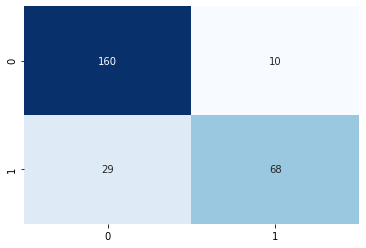

In [12]:
cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, y_pred))

In [13]:
Score = round(svc.score(X_train, y_train) * 100, 2)
Score

83.28